# Assignment 2: Milestone I Natural Language Processing
## Task 1. Basic Text Pre-processing
#### Student Name: Mashal Khan
#### Student ID: 3906303

Date: XXXX

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include all the libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy
* nltk
* itertools

## Introduction
You should give a brief information of this assessment task here.

<span style="color: red"> Note that this is a sample notebook only. You will need to fill in the proper markdown and code blocks. You might also want to make necessary changes to the structure to meet your own needs. Note also that any generic comments written in this notebook are to be removed and replace with your own words.</span>

## Importing libraries 

In [1]:
# Code to import libraries as you need in this assessment, e.g.,
import numpy as np
import pandas as pd
import re
import os
import nltk
from itertools import chain
from nltk.probability import FreqDist

### 1.1 Examining and loading data
- xamine the data folder, including the categories and job advertisment txt documents, etc. Explain your findings here, e.g., number of folders and format of txt files, etc.
- Load the data into proper data structures and get it ready for processing.
- Extract webIndex and description into proper data structures.


We're going to check the files structure of the data folder. Then check the contents of their files, to understand the data and its format.

In [2]:
dir_path = "data/Engineering"
print(os.listdir(dir_path)[:5]) # os.listdir() retrieves all the file names in a directory
dir_path = "data/Healthcare_Nursing"
print(os.listdir(dir_path)[:5])
dir_path = "data/Accounting_Finance"
print(os.listdir(dir_path)[:5])
dir_path = "data/Sales"
print(os.listdir(dir_path)[:5])

['Job_00001.txt', 'Job_00002.txt', 'Job_00003.txt', 'Job_00004.txt', 'Job_00005.txt']
['Job_00423.txt', 'Job_00424.txt', 'Job_00425.txt', 'Job_00426.txt', 'Job_00427.txt']
['Job_00232.txt', 'Job_00233.txt', 'Job_00234.txt', 'Job_00235.txt', 'Job_00236.txt']
['Job_00621.txt', 'Job_00622.txt', 'Job_00623.txt', 'Job_00624.txt', 'Job_00625.txt']


Let's read the contents of a file:

In [3]:
path = os.path.join(dir_path,'Job_00623.txt') # this gives the file path, e.g., './Engineering/Job_0001.txt'
with open(path,"r",encoding= 'unicode_escape') as f: # open the txt file
    print('Contents:\n',f.read())

Contents:
 Title: GRADUATE SALES EXECUTIVE / GRADUATE ACCOUNT MANAGER
Webindex: 69086048
Description: GRADUATE SALES EXECUTIVE / GRADUATE ACCOUNT MANAGERSector: Sports ApparelLocation: SheffieldSalary: **** basic salary OTE **** 1st year uncappedWell established branded sports apparel  over 15 years agoBespoke services offered for unique sportswearMulti million pound organisation Face to face client visitsThe Role: As a graduate sales executive you will be asked to demonstrate a professional, consultative approach and an affinity with the sports sector. Our client is keen to meet people who have excelled in sport at club level, have been involved in club management at University or have experience in retail sales. This is a fantastic opportunity to commence a career in a fast moving industry with a dynamic, forward thinking company.The Company: This privately owned company manufacture a bespoke range of club and team sports kits. They sell to the public and private sector and their cli

Let's read the data in from the files. We will read them in from the order of job IDs from the file structure:

In [4]:
# Code to inspect the provided data file...
dir_path = "data/Engineering"
job_ids = [] # list to store the job ID
job_txts = [] # list to store the raw text
engineering = []
sales = []
finance = []
health = []
for filename in sorted(os.listdir(dir_path)): # we want to load articles in ascending order of their file names
    if filename.endswith(".txt"): # we only look at the txt file
        job_ids.append(filename.split(".")[0][4:]) # split the file name with '.', 
                                                    # so the first part is the article ID, and 2nd part is 'txt'
                                                    # we then take the first part and store it
                                                    # and start from the 4th character, to just store the number
        path = os.path.join(dir_path,filename) # this gives the file path, e.g., './Engineering/Job_0001.txt'
        with open(path,"r",encoding= 'utf-8') as f: # open the txt file
            job_txts.append(f.read()) # read the file into a string, and append it to the article_txts list
            engineering.append(f.read()) # read the file into a string, and append it to the article_txts list

            f.close()
dir_path = "data/Accounting_Finance"

for filename in sorted(os.listdir(dir_path)): # we want to load articles in ascending order of their file names
    if filename.endswith(".txt"): # we only look at the txt file
        job_ids.append(filename.split(".")[0][4:]) # split the file name with '.', 
                                                    # so the first part is the article ID, and 2nd part is 'txt'
                                                    # we then take the first part and store it
                                                    # and start from the 4th character, to just store the number
        path = os.path.join(dir_path,filename) # this gives the file path, e.g., './Engineering/Job_0001.txt'
        with open(path,"r",encoding= 'utf-8') as f: # open the txt file
            job_txts.append(f.read()) # read the file into a string, and append it to the article_txts list
            finance.append(f.read()) # read the file into a string, and append it to the article_txts list

            f.close()
dir_path = "data/Healthcare_Nursing"

for filename in sorted(os.listdir(dir_path)): # we want to load articles in ascending order of their file names
    if filename.endswith(".txt"): # we only look at the txt file
        job_ids.append(filename.split(".")[0][4:]) # split the file name with '.', 
                                                    # so the first part is the article ID, and 2nd part is 'txt'
                                                    # we then take the first part and store it
                                                    # and start from the 4th character, to just store the number
        path = os.path.join(dir_path,filename) # this gives the file path, e.g., './Engineering/Job_0001.txt'
        with open(path,"r",encoding= 'utf-8') as f: # open the txt file
            job_txts.append(f.read()) # read the file into a string, and append it to the article_txts list
            health.append(f.read()) # read the file into a string, and append it to the article_txts list

            f.close()
dir_path = 'data/Sales'
for filename in sorted(os.listdir(dir_path)): # we want to load articles in ascending order of their file names
    if filename.endswith(".txt"): # we only look at the txt file
        job_ids.append(filename.split(".")[0][4:]) # split the file name with '.', 
                                                    # so the first part is the article ID, and 2nd part is 'txt'
                                                    # we then take the first part and store it
                                                    # and start from the 4th character, to just store the number
        path = os.path.join(dir_path,filename) # this gives the file path, e.g., './Engineering/Job_0001.txt'
        with open(path,"r",encoding= 'utf-8') as f: # open the txt file
            job_txts.append(f.read()) # read the file into a string, and append it to the article_txts list
            sales.append(f.read()) # read the file into a string, and append it to the article_txts list
            
            f.close()

Let's check if we have read them in correctly

In [5]:
print("number of article txt read:", len(job_txts))
print("number of article IDs read:", len(job_ids))

number of article txt read: 776
number of article IDs read: 776


This matches the number of the last ID in the Sales folder, so data has been read correctly.

Let's extract the pieces of data from all job data entries, and store them in lists.

In [6]:
# Here we create regex objects to separately extract attributes from the text files. (Makes for cleaner code)
regTitle = re.compile(r'Title: *(.+)')
regWebind = re.compile(r'Webindex: *(\d+)')
regComp = re.compile(r'Company: *(.+)')
regDesc = re.compile(r'Description: *(.+)')
titles = []
wid = []
companies = []
descriptions = []

for file in job_txts:
    titles.append(regTitle.match(file).group(1) if regTitle.search(file) else 'None')
    wid.append(regWebind.search(file).group(1) if regWebind.search(file) else 'None')
    companies.append(regComp.search(file).group(1) if regComp.search(file) else 'None')
    descriptions.append(regDesc.search(file).group(1) if regDesc.search(file) else 'None')

Let's verify the data has been read correctly:

In [7]:
print(len(titles))
print(titles[:5])
print(len(wid))
print(wid[:5])
print(len(companies))
print(companies[:5])
print(len(descriptions))
print(descriptions[:5])

776
['Telesales Operator/ Sales Negotiator', 'Assembly/Production Technicians Milton Keynes', 'Project Engineer', 'Electronics Project Engineer', 'Welder/Fabricator']
776
['71796980', '71631590', '72634040', '69265319', '70807997']
776
['CVbrowser', 'Newstaff Employment Services Ltd', 'Solutions Recruitment', 'Progressive Recruitment', 'Commercial services  Ltd']
776
['Our client, a profitable estate agent is looking to recruit telesales negotiators with excellent communication skills to join their team. A prime candidate will possess previous sales negotiating and customer service experience with an estate agency. Candidate must be able to adopt a flexible working attitude to working hours as evening and weekend working will be required. Full training is given with induction. In return you will earn a competitive basic salary with a fantastic bonus structure.', 'Main Purpose of Job:To perform a range of mechanical assembly, hydraulic installation and electrical wiring manufacturing / 

It appears all of the data has been parsed correctly, when cross-checking with the actual txt files. All of th data has a length of 767 which is correct.

In [8]:
test_ind = 399 # randomly select an element to check wehter the article ID and txt are correctly correspond to each other, 
original_txts = descriptions # Will save these for writing to file at the end
print("Job ID:", job_ids[test_ind])
print("Job txt:\n", job_txts[test_ind])

Job ID: 00400
Job txt:
 Title: PA to Managing Partner
Webindex: 70758175
Company: Wells Tobias
Description: A brand new position has arisen within a highly interesting Boutique Venture capital firm based near Victoria this is a highly exciting new position to start ASAP. In this role you will be supported the CEO, CFO and a team of 4 analysts. You will be managing busy diaries with ever changing meetings, booking global travel arrangements so you must be able to work across different timezones and have previously booked European travel. As well as other secretarial duties such as expenses, creating Excel Spreadsheets and dealing with any incoming queries or issues such as couriers and visitors to the office. The ideal candidate will have excellent communication skills, be able to work well on there own and also as part of a team. You will have a high attention to detail and enjoy a role that is different everyday and requires you to work well of your own initiative. You will ideally be

In [9]:
engineering = pd.DataFrame({'titles':titles[:232],'wid':wid[:232],'companies':companies[:232],'descriptions':descriptions[:232]})
sales = pd.DataFrame({'titles':titles[232:423],'wid':wid[232:423],'companies':companies[232:423],'descriptions':descriptions[232:423]})
finance = pd.DataFrame({'titles':titles[423:621],'wid':wid[423:621],'companies':companies[423:621],'descriptions':descriptions[423:621]})
health = pd.DataFrame({'titles':titles[621:],'wid':wid[621:],'companies':companies[621:],'descriptions':descriptions[621:]})

In [10]:
engineering['category'] = 'Engineering'
sales['category'] = 'Sales'
finance['category'] = 'Finance'
health['category'] = 'Health'

In [18]:
health.iloc[1]['companies']

"This privately owned company manufacture a bespoke range of club and team sports kits. They sell to the public and private sector and their clients include schools, universities, local education authorities and private sports clubs. The also sell a range of off the shelf products to independent retailers. Your aim will be to manage approximately **** accounts in the north west of England. You will also be targeted on opening and developing new accounts in the private sector.Responsibilities as a Graduate Sales Executive will include:Account ManagementPresenting new product linesConducting range reviews with existing customersContinual training throughout your first 18 monthsFor this Graduate Account Manager position, we are looking for individuals who meet the following criteria:Educated to degree levelExcellent verbal and communication skillsAmbitious, driven and target orientatedInterested in all sportsStrong work ethicExcellent personal presentationAbility to build rapportThe Packa

In [20]:
health.iloc[1]['descriptions']

"GRADUATE SALES EXECUTIVE / GRADUATE ACCOUNT MANAGERSector: Sports ApparelLocation: SheffieldSalary: **** basic salary OTE **** 1st year uncappedWell established branded sports apparel  over 15 years agoBespoke services offered for unique sportswearMulti million pound organisation Face to face client visitsThe Role: As a graduate sales executive you will be asked to demonstrate a professional, consultative approach and an affinity with the sports sector. Our client is keen to meet people who have excelled in sport at club level, have been involved in club management at University or have experience in retail sales. This is a fantastic opportunity to commence a career in a fast moving industry with a dynamic, forward thinking company.The Company: This privately owned company manufacture a bespoke range of club and team sports kits. They sell to the public and private sector and their clients include schools, universities, local education authorities and private sports clubs. The also se

In [11]:
full_data = pd.concat([engineering,sales,finance,health])

In [21]:
full_data

titles       wid  \
0             Telesales Operator/ Sales Negotiator  71796980   
1    Assembly/Production Technicians Milton Keynes  71631590   
2                                 Project Engineer  72634040   
3                     Electronics Project Engineer  69265319   
4                                Welder/Fabricator  70807997   
..                                             ...       ...   
150                                         Valuer  68056671   
151                   Sales Manager  IT / Telecoms  68256016   
152                            Telesales Executive  71737507   
153                  International Account Manager  70205492   
154          Estate Agency Senior Sales Negotiator  72444142   

                            companies  \
0                           CVbrowser   
1    Newstaff Employment Services Ltd   
2               Solutions Recruitment   
3             Progressive Recruitment   
4            Commercial services  Ltd   
..                                ...   
150            GCB Agency Recruitment   
151                              None   
152                THESMARTLIST.co.uk   
153                     Bond Williams   
154       ESTATE AGENCY PROFESSIONALS   

                                          descriptions     category  
0    Our client, a profitable estate agent is looki...  Engineering  
1    Main Purpose of Job:To perform a range of mech...  Engineering  
2    Working for an established engineering company...  Engineering  
3    Electronics Project Engineer  high technology ...  Engineering  
4    To carry out fabrication work based in Dyce, e...  Engineering  
..                                                 ...          ...  
150  An opportunity has arisen for a Property Value...       Health  
151  Our client is a Yorkshire based well establish...       Health  
152  LOCATION: Peterborough JOB TITLE: Marketing Ex...       Health  
153  Our client based in the outskirts of Poole in ...       Health  
154  Senior Sales Negotiator Location : Shoreditch ...       Health  

[776 rows x 5 columns]

In [42]:
full_data.loc[full_data['wid']==str(72444142),'titles'].item()

'Estate Agency Senior Sales Negotiator'

In [32]:
full_data.to_csv('data.csv')

In [13]:
engineering.to_csv('engineering.csv')
sales.to_csv('sales.csv')
finance.to_csv('finance.csv')
health.to_csv('health.csv')

### 1.2 Pre-processing data
Perform the required text pre-processing steps.

...... Sections and code blocks on basic text pre-processing


<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

We tokenise the job descriptions across all job listings using this method and the provided regex.

In [9]:
# code to perform the task...
def descTokenizer(text):
    text = text.lower() # convert to lower case
    pattern = r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?" # matches all words, including words with hyphens in between
    tokenizer = nltk.RegexpTokenizer(pattern) 
    tokenised_job = tokenizer.tokenize(text) # tokenises the input text data
    return tokenised_job

In [10]:
# code to save output data...
tokenised_jobs = [descTokenizer(desc) for desc in descriptions]  # list comprehension, generate a list of tokenized job descriptions

In [11]:
tokenised_jobs

[['our',
  'client',
  'a',
  'profitable',
  'estate',
  'agent',
  'is',
  'looking',
  'to',
  'recruit',
  'telesales',
  'negotiators',
  'with',
  'excellent',
  'communication',
  'skills',
  'to',
  'join',
  'their',
  'team',
  'a',
  'prime',
  'candidate',
  'will',
  'possess',
  'previous',
  'sales',
  'negotiating',
  'and',
  'customer',
  'service',
  'experience',
  'with',
  'an',
  'estate',
  'agency',
  'candidate',
  'must',
  'be',
  'able',
  'to',
  'adopt',
  'a',
  'flexible',
  'working',
  'attitude',
  'to',
  'working',
  'hours',
  'as',
  'evening',
  'and',
  'weekend',
  'working',
  'will',
  'be',
  'required',
  'full',
  'training',
  'is',
  'given',
  'with',
  'induction',
  'in',
  'return',
  'you',
  'will',
  'earn',
  'a',
  'competitive',
  'basic',
  'salary',
  'with',
  'a',
  'fantastic',
  'bonus',
  'structure'],
 ['main',
  'purpose',
  'of',
  'job',
  'to',
  'perform',
  'a',
  'range',
  'of',
  'mechanical',
  'assembly',
  

This method conveniently prints out the textual statistics of the corpus, using the tokenised job descriptions

In [12]:
def stats_print(tokenised_jobs):
    words = list(chain.from_iterable(tokenised_jobs)) # use chain to flatten or put all the tokens in the corpus in a single list
    vocab = set(words) # create the set of types for the tokens i.e the vocabulary by applying the set method to get rid of duplicates.
    lexical_diversity = len(vocab)/len(words) # proportion of uniwue words to all words; how diverse all of the tokens are in the dataset
    print("Vocabulary size: ",len(vocab))
    print("Total number of tokens: ", len(words))
    print("Lexical diversity: ", lexical_diversity)
    print("Total number of articles:", len(tokenised_jobs))
    lens = [len(job) for job in tokenised_jobs]
    print("Average document length:", np.mean(lens))
    print("Maximum document length:", np.max(lens))
    print("Minimum document length:", np.min(lens))
    print("Standard deviation of document length:", np.std(lens))

In [13]:
stats_print(tokenised_jobs)

Vocabulary size:  9834
Total number of tokens:  186952
Lexical diversity:  0.052601737344345076
Total number of articles: 776
Average document length: 240.91752577319588
Maximum document length: 815
Minimum document length: 13
Standard deviation of document length: 124.97750685071483


In [14]:
words = list(chain.from_iterable(tokenised_jobs)) # we put all the tokens in the corpus in a single list
vocab = set(words) # compute the vocabulary by converting the list of words/tokens to a set, i.e., giving a set of unique words

In [15]:
term_fd = FreqDist(words) # compute term frequency for each unique word/type
term_fd.most_common(25)

[('and', 8309),
 ('the', 6487),
 ('to', 6265),
 ('a', 4708),
 ('of', 4630),
 ('in', 3290),
 ('for', 2832),
 ('with', 2306),
 ('will', 2021),
 ('you', 2011),
 ('be', 1869),
 ('is', 1793),
 ('as', 1425),
 ('this', 1393),
 ('an', 1361),
 ('are', 1332),
 ('experience', 1276),
 ('on', 1216),
 ('have', 1114),
 ('or', 1088),
 ('sales', 1030),
 ('role', 946),
 ('work', 861),
 ('business', 832),
 ('your', 816)]

## Cleaning the tokens
### Remove all tokens with less than 2 characters

In [16]:
tokenised_jobs = [[word for word in desc if len(word) > 1] # Generate a subset of all tokens with lengths greater than 1
                      for desc in tokenised_jobs]

### Removing stopwords

In [17]:
stop_words = []
with open('stopwords_en.txt','r') as f: # Read stopwords from file
    for ln in f.readlines():
        stop_words.append(ln.rstrip('\n')) # ln.strip removes '\n' from the strings
        
tokenised_jobs = [[w for w in desc if w not in stop_words] # return list with all the words NOT in the stop_words list
                      for desc in tokenised_jobs]
words = list(chain.from_iterable([set(desc) for desc in tokenised_jobs]))
doc_fd = FreqDist(words)
doc_fd.most_common(25)

[('experience', 586),
 ('role', 499),
 ('work', 453),
 ('team', 431),
 ('working', 407),
 ('skills', 366),
 ('client', 358),
 ('job', 348),
 ('company', 343),
 ('business', 342),
 ('uk', 316),
 ('excellent', 309),
 ('management', 301),
 ('based', 287),
 ('apply', 286),
 ('opportunity', 280),
 ('salary', 270),
 ('required', 269),
 ('successful', 267),
 ('support', 261),
 ('join', 252),
 ('candidate', 248),
 ('service', 242),
 ('knowledge', 241),
 ('development', 235)]

### Removing lowest frequency words across all documents

In [18]:
lessFreqWords = set(doc_fd.hapaxes()) # Returns list of all word tokens with a frequency of 1
lessFreqWords

{'surreysalary',
 'resolutions',
 'highspec',
 'wrexham',
 'electronically',
 'nostros',
 'pocket',
 'accumulation',
 'managerkareplus',
 'replication',
 'delahuntyrandstad',
 'solet',
 'victoria',
 'escort',
 'transverse',
 'fromthe',
 'compete',
 'stocked',
 'whollyowned',
 'alton',
 'alot',
 'residing',
 'germanspeakingtelemarketer',
 'instances',
 'spectacles',
 'preassessment',
 'scratch',
 'managementpresenting',
 'unsocial',
 'multiaward',
 'upwards',
 'everincreasingly',
 'extent',
 'populus',
 'dsg',
 'boms',
 'brokerages',
 'adstream',
 'salesexecutivemeetingseventsaberdeen',
 'bitton',
 'gordonamrgroup',
 'authoritative',
 "driver's",
 'littlehampton',
 'tyseley',
 'mitigations',
 'unearned',
 'manylebau',
 'organisers',
 'rotational',
 'transmitters',
 'weighing',
 'gpp',
 'cyfweliadau',
 'parents',
 'sandbach',
 'interconnected',
 'souths',
 'battlewinning',
 'callington',
 'populusconsultants',
 'analytically',
 'andover',
 'capacities',
 'smd',
 'regulatorsexcellent',
 '

In [19]:
tokenised_jobs = [[w for w in desc if w not in lessFreqWords] # return list with all the words with a frequency of 1 in a job description
                      for desc in tokenised_jobs]
words = list(chain.from_iterable([set(desc) for desc in tokenised_jobs]))
doc_fd = FreqDist(words)
doc_fd.most_common(25)

[('experience', 586),
 ('role', 499),
 ('work', 453),
 ('team', 431),
 ('working', 407),
 ('skills', 366),
 ('client', 358),
 ('job', 348),
 ('company', 343),
 ('business', 342),
 ('uk', 316),
 ('excellent', 309),
 ('management', 301),
 ('based', 287),
 ('apply', 286),
 ('opportunity', 280),
 ('salary', 270),
 ('required', 269),
 ('successful', 267),
 ('support', 261),
 ('join', 252),
 ('candidate', 248),
 ('service', 242),
 ('knowledge', 241),
 ('development', 235)]

###  Remove the top 50 words from the corpus

In [20]:
top_50 = [word[0] for word in doc_fd.most_common(50)] # We store the top 50 words to verify their removal later
tokenised_jobs = [[w for w in desc if w not in top_50] # return list with all the top 50 common words in a job description
                      for desc in tokenised_jobs]
words = list(chain.from_iterable([set(desc) for desc in tokenised_jobs]))
doc_fd = FreqDist(words)
doc_fd.most_common(50)

[('customer', 182),
 ('environment', 182),
 ('communication', 181),
 ('opportunities', 181),
 ('candidates', 179),
 ('time', 176),
 ('requirements', 172),
 ('career', 172),
 ('experienced', 172),
 ('responsible', 171),
 ('part', 171),
 ('ensure', 169),
 ('key', 169),
 ('care', 168),
 ('level', 166),
 ('totaljobs', 165),
 ('industry', 162),
 ('ideally', 156),
 ('professional', 156),
 ('staff', 151),
 ('quality', 150),
 ('days', 150),
 ('range', 148),
 ('develop', 148),
 ('hours', 147),
 ('agency', 145),
 ('engineering', 144),
 ('systems', 142),
 ('market', 142),
 ('employment', 142),
 ('years', 141),
 ('area', 140),
 ('qualified', 137),
 ('financial', 135),
 ('people', 135),
 ('email', 134),
 ('office', 133),
 ('process', 132),
 ('call', 132),
 ('customers', 128),
 ('offer', 128),
 ('organisation', 127),
 ('senior', 127),
 ('providing', 127),
 ('responsibilities', 126),
 ('relevant', 126),
 ('manage', 125),
 ('technical', 124),
 ('background', 123),
 ('understanding', 122)]

Verify all top 50 words have been removed from corpus:

In [21]:
for l in [[w for w in desc if w in top_50] for desc in tokenised_jobs]:
    if l!=[]:
        print(l)
print('Done')

Done


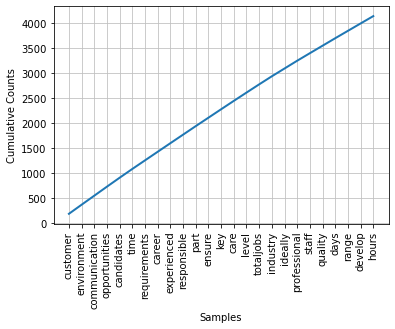

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [22]:
doc_fd.plot(25, cumulative=True) # Check the frequency distribution across the corpus

We use the stats_print() method to evaluate the difference we made in the preprocessing of the tokenisation and vocabulary.

We've dramatically reduced the size of the vocabulary and documents/tokens, however the lexical diversity has not improved much.

In [24]:
stats_print(tokenised_jobs)

Vocabulary size:  4711
Total number of tokens:  80007
Lexical diversity:  0.058882347794567975
Total number of articles: 776
Average document length: 103.10180412371135
Maximum document length: 401
Minimum document length: 7
Standard deviation of document length: 57.553504437469286


Original:<br>
Vocabulary size:  9834<br>
Total number of tokens:  186952<br>
Lexical diversity:  0.052601737344345076<br>
Total number of articles: 776<br>
Average document length: 240.91752577319588<br>
Maximum document length: 815<br>
Minimum document length: 13<br>
Standard deviation of document length: 124.97750685071483<br>

## Saving required outputs
Save the vocabulary, bigrams and job advertisment txt as per spectification.
- vocab.txt

In [25]:
words = list(chain.from_iterable([set(desc) for desc in tokenised_jobs]))

[word for word in words if '\n' in word] # Verify no /n characters are in the data

[]

In [26]:
print(doc_fd)

<FreqDist with 4711 samples and 61774 outcomes>


In [27]:
doc_fd = FreqDist(words)
#This code sorts the vocabulary by the frequency of word occurrences, using a lambda function
sorted_freqs = sorted([(word[0],word[1]) for word in doc_fd.most_common()],key=lambda x:x[0]) 

In [28]:
sorted_freqs

[('aaron', 3),
 ('aat', 6),
 ('abb', 2),
 ('aberdeen', 7),
 ('abi', 2),
 ('abilities', 8),
 ('abreast', 3),
 ('abroad', 7),
 ('absence', 15),
 ('absolute', 3),
 ('ac', 9),
 ('aca', 29),
 ('academic', 14),
 ('academy', 6),
 ('acca', 27),
 ('accept', 21),
 ('acceptable', 2),
 ('acceptance', 5),
 ('accepted', 5),
 ('access', 38),
 ('accessible', 5),
 ('accident', 4),
 ('accommodates', 3),
 ('accommodation', 11),
 ('accomplished', 3),
 ('accordance', 32),
 ('account', 98),
 ('accountabilities', 13),
 ('accountability', 11),
 ('accountable', 12),
 ('accountancy', 12),
 ('accountant', 35),
 ('accountants', 9),
 ('accounting', 39),
 ('accounts', 86),
 ('accreditation', 5),
 ('accredited', 2),
 ('accruals', 4),
 ('accuracy', 24),
 ('accurate', 46),
 ('accurately', 19),
 ('achievable', 5),
 ('achieve', 59),
 ('achieved', 26),
 ('achievement', 21),
 ('achievements', 2),
 ('achiever', 2),
 ('achieving', 23),
 ('acii', 2),
 ('acquired', 10),
 ('acquisition', 9),
 ('acquisitions', 3),
 ('act', 45),

In [30]:
with open('tokenised_descriptions.txt','w') as f:
    f.writelines([(' '.join(desc) + '\n') for desc in tokenised_jobs])
    
with open('vocab.txt','w') as f:
    for pair in sorted_freqs:
        f.write(pair[0] + ':' + str(pair[1]) + '\n')

In [31]:
'\t'.join([job_ids[44],titles[44],wid[44],companies[44]]) # Verify the file data is split up by tabs

'00045\tProject Manager x **** – Residential Development – London\t72427959\tredfish solutions ltd'

In [32]:
[title for title in titles if '\n' in title]

[]

In [33]:
with open('job_txts.txt','w',encoding="utf-8") as f:
    f.writelines([desc + '\n' for desc in job_txts])

i = 0
with open('extra.tsv','w',encoding="utf-8") as f:
    for job_id in job_ids:
        f.write('\t'.join([job_id,titles[i],wid[i],companies[i],original_txts[i]]) + '\n')
        i += 1

The data has been successfully tokenized and preprocessed.